In [306]:
import sys
from pyprojroot import here
sys.path.append(str(here()))
import dotenv
import os
import openai
from langchain_openai import ChatOpenAI, AzureChatOpenAI

# Load environment variables from .env file
dotenv.load_dotenv()

# Set Azure OpenAI credentials
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_EMBEDDING_DEPLOYMENT_NAME = os.getenv("AZURE_EMBEDDING_DEPLOYMENT_NAME") # Deployment name
AZURE_EMBEDDING_MODEL_NAME = os.getenv("AZURE_EMBEDDING_MODEL_NAME")  # Model name
AZURE_EMBEDDING_MODEL_VERSION = os.getenv("AZURE_EMBEDDING_MODEL_VERSION")  # Model version
AZURE_OPENAI_API_VERSION=os.getenv("AZURE_OPENAI_API_VERSION")

In [307]:

import json
data_dir = here("data/papers/Na-Mn-O")
input_file = os.path.join(data_dir, "000690060_synthesis_and_challenges.json")

with open(input_file, "r", encoding="utf-8") as f:
    synthesis_data = json.load(f)

challenges_info = synthesis_data.get("challenges_info", [])

# Prepare challenge and solution texts
challenge_texts = [c["challenge"]["description"] + " " + c["challenge"]["type"] + " " + c["challenge"]["impact"] for c in challenges_info]
solution_texts = [c["solution"]["description"] + " " + c["solution"]["methodology"] + " " + c["solution"]["effectiveness"] for c in challenges_info]
materials_names = [c["material"] for c in challenges_info]
stages = [c["stage"] for c in challenges_info]

print("Materials:", materials_names)
print("Stages:", stages)
print("Challenges:", challenge_texts)
print("Solutions:", solution_texts)


Materials: ['P2−NaxMnO2 flakes', 'P2−NaxMnO2 spheres', 'P2−NaxCo0.1Mn0.9O2 flakes', 'P2−NaxCo0.1Mn0.9O2 spheres']
Stages: ['application', 'application', 'application', 'application']
Challenges: ['Partial phase transition to an orthorhombic crystal system upon Na+ insertion. structural Repeated phase transitions lead to structural inhomogeneity, reducing cycling stability.', 'Higher strain within the structure due to reduced volume expansion and contraction. structural Strain accumulation may lead to structural fatigue during cycling.', 'Structural heterogeneity due to repeated phase transformations. structural Structural inhomogeneity reduces cycling stability.', 'Potential inhomogeneities in Na+ distribution throughout the material. chemical Inhomogeneities may affect cycling stability and capacity retention.']
Solutions: ['Co-doping on the order of 10% suppresses structural transformations. Incorporation of cobalt into the material structure. Successfully suppresses phase transition

In [308]:
import openai
from openai import AzureOpenAI

# Setup Azure client (new SDK structure)
client = AzureOpenAI(
    api_key=AZURE_OPENAI_API_KEY,
    api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
)

# Embedding function using the new SDK
def get_embeddings(texts, deployment_name):
    embeddings = []
    for text in texts:
        response = client.embeddings.create(
            input=text,
            model=deployment_name,  # Must match your Azure deployment name
        )
        embeddings.append(response.data[0].embedding)
    return embeddings


In [309]:
challenge_embeddings_openai_embed = get_embeddings(challenge_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)
solution_embeddings_openai_embed = get_embeddings(solution_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)


In [310]:
challenge_embeddings_openai_embed

[[0.008698652498424053,
  0.003933217376470566,
  0.005667003337293863,
  0.001870837644673884,
  -0.0064694988541305065,
  0.01367214135825634,
  -0.010495184920728207,
  -0.03122796304523945,
  -0.006228419952094555,
  -0.003877075854688883,
  0.031597837805747986,
  0.0031026513315737247,
  0.0033189619425684214,
  0.0017684617778286338,
  0.013302266597747803,
  -0.007972112856805325,
  0.02826896868646145,
  0.009108155965805054,
  -0.0011657647555693984,
  -0.00683607067912817,
  -0.02641959674656391,
  0.002637005876749754,
  -0.01155196875333786,
  -0.027238603681325912,
  -0.014702505432069302,
  -0.0026502157561481,
  0.02162444032728672,
  -0.023671958595514297,
  -0.013553253374993801,
  0.00566039839759469,
  -0.004590405151247978,
  -0.011538758873939514,
  -0.023777637630701065,
  -0.017925696447491646,
  -0.014596827328205109,
  -0.0047819470055401325,
  0.016974590718746185,
  -0.01636693999171257,
  0.005432529374957085,
  -0.018137052655220032,
  0.01718594692647457,

# Create embeddings for all challenges, and solutions for Na-Mn-O systems

In [311]:
# prepare the list of all JSON files for research papers
import json
import os
data_dir = here("data/papers/Na-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []

# Loop through each file and extract the relevant information
for file in files:
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # Prepare challenge and solution texts
    for c in challenges_info:
        challenge_texts.append(c.get("challenge", {}).get("description", "") + " " + c.get("challenge", {}).get("type", "") + " " + c.get("challenge", {}).get("impact", ""))
        solution_texts.append(c.get("solution", {}).get("description", "") + " " + c.get("solution", {}).get("methodology", "") + " " + c.get("solution", {}).get("effectiveness", ""))
        materials_names.append(c.get("material", ""))
        stages.append(c.get("stage", ""))
    

print("Num. of materials:", len(materials_names), "Materials:", materials_names)
print("Num. of stages:", len(stages), "Stages:", stages)
print("Num. of challenges:", len(challenge_texts), "Challenges:", challenge_texts)
print("Num. of solutions:", len(solution_texts), "Solutions:", solution_texts)

Num. of materials: 14 Materials: ['P2-Na0.67MnO2', 'P2-Na0.67Mn1−xCoxO2 (x = 0.2)', 'P2-Na0.67Mn1−xCoxO2 (x = 0.2)', 'P2-Na0.67Mn1−xCoxO2 (x = 0.2)', 'Na0.67MnO2', 'Na0.67Al0.1Fe0.05Mn0.85O2', 'Na0.67MxMn1-xO2 (M = Li+, Mg2+, Al3+, Fe3+)', 'Li2-xMnO3', 'Li2-xMnO3', 'Li2-xMnO3', 'P2−NaxMnO2 flakes', 'P2−NaxMnO2 spheres', 'P2−NaxCo0.1Mn0.9O2 flakes', 'P2−NaxCo0.1Mn0.9O2 spheres']
Num. of stages: 14 Stages: ['application', 'synthesis', 'testing', 'application', 'synthesis', 'application', 'synthesis', 'application', 'synthesis', 'characterization', 'application', 'application', 'application', 'application']
Num. of challenges: 14 Challenges: ['Poor electrochemical stability due to Na+/vacancy interactions and MO2 layer slip during sodium ion de-intercalation. structural Causes irreversible phase transitions, limiting the cycling stability and performance of the material.', 'Uniform doping of Co ions into the Mn site while maintaining high purity and uniform particle size. procedural Non-u

In [312]:
# Create embeddings for all challenges and solutions
challenge_embeddings_openai_embed = get_embeddings(challenge_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)
solution_embeddings_openai_embed = get_embeddings(solution_texts, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# Fit the model to the challenge embeddings

In [313]:
print("Num of embedding vectors in challenges:", len(challenge_embeddings_openai_embed), "shape of each vector:", len(challenge_embeddings_openai_embed[0]))


Num of embedding vectors in challenges: 14 shape of each vector: 1536


⚠️ Challenges with High-Dimensional, Low-Sample-Size Data
Curse of Dimensionality: In high-dimensional spaces, distances between points become less meaningful, making it difficult for clustering algorithms to identify distinct groups.​

Small Sample Size: With only 14 samples, estimating reliable clusters becomes challenging, potentially leading to overfitting or identifying spurious clusters.​

✅ Recommended Approach
To effectively apply Agglomerative Clustering to your dataset, consider the following steps:

1. Dimensionality Reduction
Reduce the dimensionality of your data to mitigate the curse of dimensionality. Options include:​

Principal Component Analysis (PCA): Linear technique that projects data onto directions of maximum variance.​

Uniform Manifold Approximation and Projection (UMAP): Non-linear technique that preserves both local and global data structure, often yielding better clustering results in high-dimensional data.​

t-Distributed Stochastic Neighbor Embedding (t-SNE): Non-linear technique that excels at preserving local structure but may distort global relationships.

In [314]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_vectors_PCA = pca.fit_transform(challenge_embeddings_openai_embed)
reduced_vectors_PCA[0]


array([-0.1391284 ,  0.05870826])

In [315]:
import umap

# Reduce dimensionality to 2 components
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenge_embeddings_openai_embed)
reduced_vectors_umap[0]

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


array([1.1735635, 3.9891999], dtype=float32)

In [316]:
from sklearn.metrics import silhouette_score
scores = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_PCA)
    score = silhouette_score(reduced_vectors_PCA, labels)
    scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.4551963560758086
Number of clusters: 3, Silhouette Score: 0.522637083046328
Number of clusters: 4, Silhouette Score: 0.3934655652042852
Number of clusters: 5, Silhouette Score: 0.510727945676334
Number of clusters: 6, Silhouette Score: 0.40953230301062593
Number of clusters: 7, Silhouette Score: 0.3775585908413026
Number of clusters: 8, Silhouette Score: 0.4858139689912133
Number of clusters: 9, Silhouette Score: 0.4428186573519311


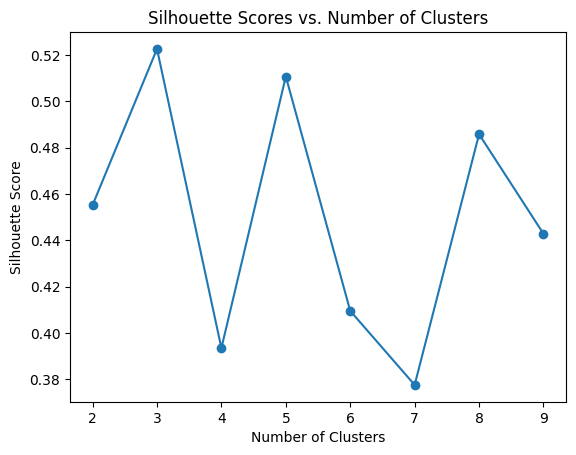

In [317]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [318]:
from sklearn.metrics import silhouette_score
scores = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_umap)
    score = silhouette_score(reduced_vectors_umap, labels)
    scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.2784985899925232
Number of clusters: 3, Silhouette Score: 0.2981589734554291
Number of clusters: 4, Silhouette Score: 0.30225566029548645
Number of clusters: 5, Silhouette Score: 0.28035029768943787
Number of clusters: 6, Silhouette Score: 0.2632298171520233
Number of clusters: 7, Silhouette Score: 0.1523517221212387
Number of clusters: 8, Silhouette Score: 0.10215020179748535
Number of clusters: 9, Silhouette Score: 0.056158266961574554


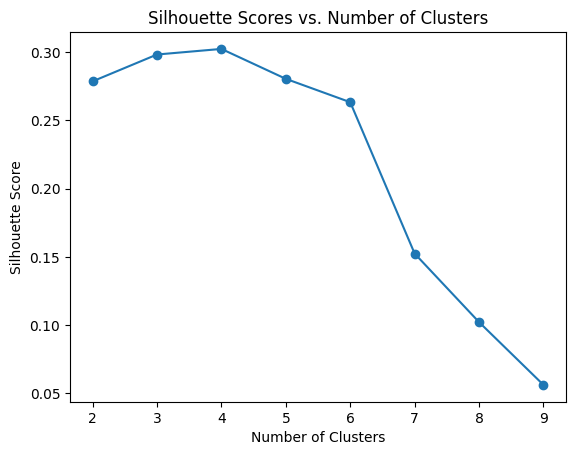

In [319]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# KMeans clustering


In [320]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(reduced_vectors_PCA)

# Predict the clusters
labels = kmeans.predict(reduced_vectors_PCA)

# Cluster centers
centroids = kmeans.cluster_centers_



In [321]:
print(centroids.shape)
print(centroids)
print(labels)

challenge = 0
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

(4, 2)
[[-0.07563312 -0.03688564]
 [ 0.16728715  0.20104329]
 [ 0.18992066 -0.2098682 ]
 [-0.27663784  0.11169161]]
[0 1 0 3 1 0 1 0 0 0 0 2 2 0]
Challenge: Poor electrochemical stability due to Na+/vacancy interactions and MO2 layer slip during sodium ion de-intercalation. structural Causes irreversible phase transitions, limiting the cycling stability and performance of the material.
Challenge: Voltage fade during consecutive charge-discharge cycles. electrochemical Reduces the long-term stability and energy density of the material, limiting its practical application.
Challenge: Notorious Jahn-Teller effect caused by high Mn3+ content. chemical Leads to multiphase transitions during cycling and poor long-term cycling stability.
Challenge: Significant degradation upon cycling in the Li-system due to structural phase transitions. structural Poor cycle stability, limiting the material's effectiveness as an electrode in lithium-ion batteries.
Challenge: Residual Li-containing phase detec

In [322]:
challenge = 1
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Uniform doping of Co ions into the Mn site while maintaining high purity and uniform particle size. procedural Non-uniform doping could lead to inconsistent electrochemical performance and structural instability.
Challenge: Formation of Mn vacancies during cooling process. structural Mn vacancies lead to structural distortion and reduced electrochemical performance.
Challenge: Orthorhombic distortion in materials with low theoretical Mn valence. structural Distortion reduces structural stability and negatively affects electrochemical performance.


In [323]:
challenge = 2
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Higher strain within the structure due to reduced volume expansion and contraction. structural Strain accumulation may lead to structural fatigue during cycling.
Challenge: Structural heterogeneity due to repeated phase transformations. structural Structural inhomogeneity reduces cycling stability.


In [324]:
challenge = 3
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: High migration energy barrier for Na+ diffusion in the pristine material. kinetic Limits the rate capability and overall performance of the material in high-power applications.


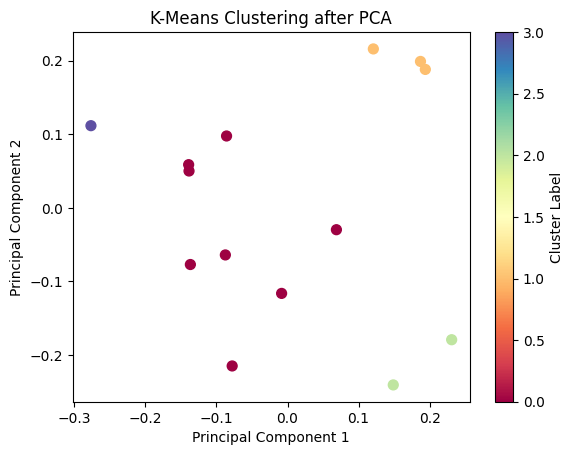

In [325]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_PCA[:, 0], reduced_vectors_PCA[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('K-Means Clustering after PCA')
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [326]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
silhouette = silhouette_score(reduced_vectors_PCA, labels)
davies_bouldin = davies_bouldin_score(reduced_vectors_PCA, labels)
calinski_harabasz = calinski_harabasz_score(reduced_vectors_PCA, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.3934655652042852
Davies-Bouldin Index: 0.4721150706624037
Calinski-Harabasz Index: 14.026397061436162


1. Silhouette Score (0.3935)
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1:​
DZone
+3
Wikipedia
+3
Analytics Vidhya
+3

> 0.7: Strong structure

0.5 – 0.7: Reasonable structure

0.25 – 0.5: Weak structure

< 0.25: No substantial structure​
Wikipedia
mishasv.com
+6
Wikipedia
+6
Wikipedia
+6
Communalytic
+8
Cross Validated
+8
Analytics Yogi
+8

A score of 0.3935 falls into the "weak structure" category, indicating that while there is some clustering structure, it's not particularly strong. ​

2. Davies-Bouldin Index (0.4722)
The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar one, considering both cluster dispersion and separation. Lower values indicate better clustering.​
GPTutorPro

A score of 0.4722 is relatively low, suggesting that the clusters are compact and well-separated, which is favorable. ​
GeeksforGeeks

3. Calinski-Harabasz Index (14.03)
The Calinski-Harabasz Index assesses cluster dispersion; higher values signify better-defined clusters. However, this index is sensitive to the dataset's size and dimensionality.​

A score of 14.03 is moderate. Without a benchmark or comparison to other clustering solutions on the same dataset, it's challenging to determine its adequacy.

In [329]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(reduced_vectors_umap)

# Predict the clusters
labels = kmeans.predict(reduced_vectors_umap)

# Cluster centers
centroids = kmeans.cluster_centers_



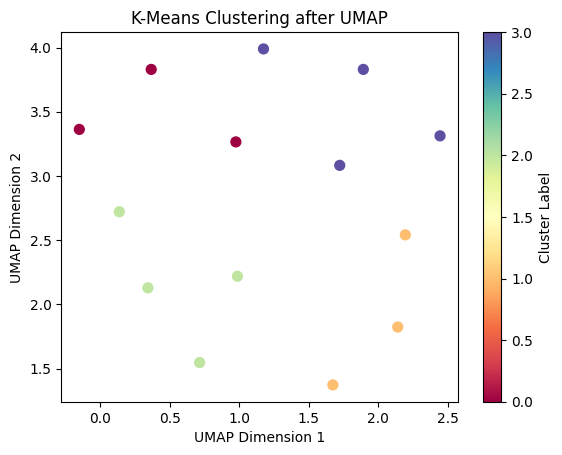

In [330]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_umap[:, 0], reduced_vectors_umap[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('K-Means Clustering after UMAP')
plt.colorbar(label='Cluster Label')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [287]:
challenge = 0
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Poor electrochemical stability due to Na+/vacancy interactions and MO2 layer slip during sodium ion de-intercalation. structural Causes irreversible phase transitions, limiting the cycling stability and performance of the material.
Challenge: Voltage fade during consecutive charge-discharge cycles. electrochemical Reduces the long-term stability and energy density of the material, limiting its practical application.
Challenge: Significant degradation upon cycling in the Li-system due to structural phase transitions. structural Poor cycle stability, limiting the material's effectiveness as an electrode in lithium-ion batteries.
Challenge: Residual Li-containing phase detected after delithiation. chemical Inconsistent delithiation capacity and potential side reactions during cycling.


In [288]:
challenge = 1
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: High migration energy barrier for Na+ diffusion in the pristine material. kinetic Limits the rate capability and overall performance of the material in high-power applications.
Challenge: Loss of crystallographic regularity during Na insertion. structural Reduced crystallinity may negatively affect the material's electrochemical performance and long-term stability.
Challenge: Partial phase transition to an orthorhombic crystal system upon Na+ insertion. structural Repeated phase transitions lead to structural inhomogeneity, reducing cycling stability.
Challenge: Higher strain within the structure due to reduced volume expansion and contraction. structural Strain accumulation may lead to structural fatigue during cycling.
Challenge: Structural heterogeneity due to repeated phase transformations. structural Structural inhomogeneity reduces cycling stability.
Challenge: Potential inhomogeneities in Na+ distribution throughout the material. chemical Inhomogeneities may affect cy

In [289]:
challenge = 2
for i in range(len(labels)):
    if labels[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Uniform doping of Co ions into the Mn site while maintaining high purity and uniform particle size. procedural Non-uniform doping could lead to inconsistent electrochemical performance and structural instability.
Challenge: Formation of Mn vacancies during cooling process. structural Mn vacancies lead to structural distortion and reduced electrochemical performance.
Challenge: Notorious Jahn-Teller effect caused by high Mn3+ content. chemical Leads to multiphase transitions during cycling and poor long-term cycling stability.
Challenge: Orthorhombic distortion in materials with low theoretical Mn valence. structural Distortion reduces structural stability and negatively affects electrochemical performance.


HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) to cluster challenge and solution embeddings. HDBSCAN is particularly effective for datasets with clusters of varying densities and can identify noise points (outliers) that don't belong to any cluster.

In [243]:
# Initialize HDBSCAN with desired parameters
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=3,       # Minimum size of clusters; adjust as needed
    min_samples=1,            # Minimum samples in a neighborhood for a point to be a core point
    metric='euclidean',       # Distance metric
    cluster_selection_method='eom'  # Method to select clusters
)

# Fit the model to your embeddings
labels_hdbscan = clusterer.fit_predict(reduced_vectors_PCA)
# Get the cluster labels
print(labels_hdbscan)



[1 0 1 1 0 1 0 1 1 1 1 1 1 1]


/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


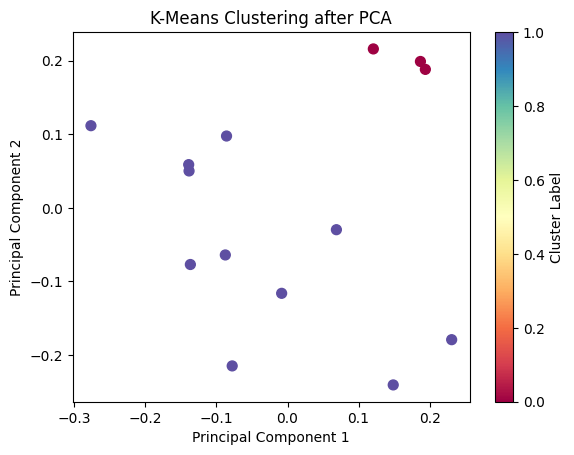

In [279]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_PCA[:, 0], reduced_vectors_PCA[:, 1], c=labels_hdbscan, cmap='Spectral', s=50)
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [245]:
import hdbscan

# Try different combinations
for min_cluster_size in range(2, 6):
    for min_samples in range(1, min_cluster_size + 1):
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=min_samples,
            metric='euclidean',
            cluster_selection_method='eom'
        )
        labels = clusterer.fit_predict(challenge_embeddings)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, "
              f"Clusters: {n_clusters}, Noise points: {n_noise}")


min_cluster_size: 2, min_samples: 1, Clusters: 2, Noise points: 7
min_cluster_size: 2, min_samples: 2, Clusters: 0, Noise points: 14
min_cluster_size: 3, min_samples: 1, Clusters: 2, Noise points: 7
min_cluster_size: 3, min_samples: 2, Clusters: 0, Noise points: 14
min_cluster_size: 3, min_samples: 3, Clusters: 0, Noise points: 14
min_cluster_size: 4, min_samples: 1, Clusters: 0, Noise points: 14
min_cluster_size: 4, min_samples: 2, Clusters: 0, Noise points: 14
min_cluster_size: 4, min_samples: 3, Clusters: 0, Noise points: 14
min_cluster_size: 4, min_samples: 4, Clusters: 0, Noise points: 14
min_cluster_size: 5, min_samples: 1, Clusters: 0, Noise points: 14
min_cluster_size: 5, min_samples: 2, Clusters: 0, Noise points: 14
min_cluster_size: 5, min_samples: 3, Clusters: 0, Noise points: 14
min_cluster_size: 5, min_samples: 4, Clusters: 0, Noise points: 14
min_cluster_size: 5, min_samples: 5, Clusters: 0, Noise points: 14


/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


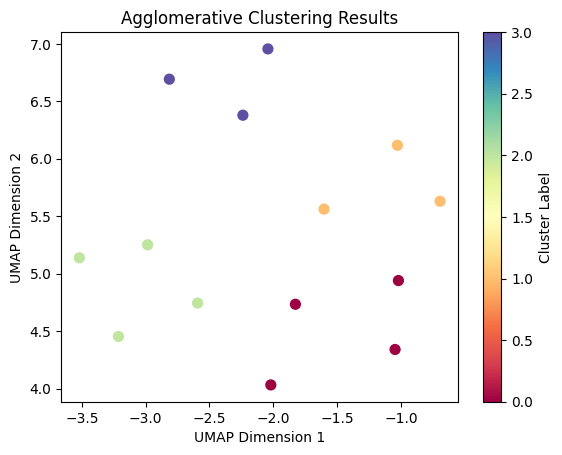

In [270]:
import umap
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Reduce dimensionality
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(reduced_vectors_PCA)

# Apply Agglomerative Clustering
clusterer = AgglomerativeClustering(n_clusters=4, linkage='average')
labels_agglomerative = clusterer.fit_predict(embedding_2d)

# Visualization
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels_agglomerative, cmap='Spectral', s=50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [271]:
challenge = 0
for i in range(len(labels_agglomerative)):
    if labels_agglomerative[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Significant degradation upon cycling in the Li-system due to structural phase transitions. structural Poor cycle stability, limiting the material's effectiveness as an electrode in lithium-ion batteries.
Challenge: Residual Li-containing phase detected after delithiation. chemical Inconsistent delithiation capacity and potential side reactions during cycling.
Challenge: Partial phase transition to an orthorhombic crystal system upon Na+ insertion. structural Repeated phase transitions lead to structural inhomogeneity, reducing cycling stability.
Challenge: Potential inhomogeneities in Na+ distribution throughout the material. chemical Inhomogeneities may affect cycling stability and capacity retention.


In [272]:
challenge = 1
for i in range(len(labels_agglomerative)):
    if labels_agglomerative[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Notorious Jahn-Teller effect caused by high Mn3+ content. chemical Leads to multiphase transitions during cycling and poor long-term cycling stability.
Challenge: Higher strain within the structure due to reduced volume expansion and contraction. structural Strain accumulation may lead to structural fatigue during cycling.
Challenge: Structural heterogeneity due to repeated phase transformations. structural Structural inhomogeneity reduces cycling stability.


In [273]:
challenge = 2
for i in range(len(labels_agglomerative)):
    if labels_agglomerative[i] == challenge:
        print("Challenge:", challenge_texts[i])

Challenge: Poor electrochemical stability due to Na+/vacancy interactions and MO2 layer slip during sodium ion de-intercalation. structural Causes irreversible phase transitions, limiting the cycling stability and performance of the material.
Challenge: Voltage fade during consecutive charge-discharge cycles. electrochemical Reduces the long-term stability and energy density of the material, limiting its practical application.
Challenge: High migration energy barrier for Na+ diffusion in the pristine material. kinetic Limits the rate capability and overall performance of the material in high-power applications.
Challenge: Loss of crystallographic regularity during Na insertion. structural Reduced crystallinity may negatively affect the material's electrochemical performance and long-term stability.


In [274]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
silhouette = silhouette_score(reduced_vectors_PCA, labels_agglomerative)
davies_bouldin = davies_bouldin_score(reduced_vectors_PCA, labels_agglomerative)
calinski_harabasz = calinski_harabasz_score(reduced_vectors_PCA, labels_agglomerative)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.4976829597641584
Davies-Bouldin Index: 0.6560120671104129
Calinski-Harabasz Index: 21.356552431730282


# Other embedding models

other embedding models that are more suitable for scientific text. Here are some options:

1. SciBERT
Description: SciBERT is a BERT-based model trained on scientific text, including papers from Semantic Scholar.
Use Case: It is specifically designed for scientific and technical domains, making it a good choice for embedding scientific challenges and solutions.


In [290]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load SciBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

# Function to get embeddings
def get_sci_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
            # Use the [CLS] token embedding
            embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().numpy())
    return embeddings

# Example usage
challenge_embeddings_scibert = get_sci_embeddings(challenge_texts)
solution_embeddings_scibert = get_sci_embeddings(solution_texts)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [296]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_vectors_PCA = pca.fit_transform(challenge_embeddings_scibert)
reduced_vectors_PCA[0]

array([-4.08868077, -1.19857181])

In [297]:
import umap

# Reduce dimensionality to 2 components
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenge_embeddings_scibert)
reduced_vectors_umap[0]

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


array([ 5.2705154, 12.124257 ], dtype=float32)

In [298]:
from sklearn.metrics import silhouette_score
scores = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_PCA)
    score = silhouette_score(reduced_vectors_PCA, labels)
    scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.39204619513736827
Number of clusters: 3, Silhouette Score: 0.4648526626522983
Number of clusters: 4, Silhouette Score: 0.40272920145879304
Number of clusters: 5, Silhouette Score: 0.3781207076493483
Number of clusters: 6, Silhouette Score: 0.39039508944658075
Number of clusters: 7, Silhouette Score: 0.41720703099433604
Number of clusters: 8, Silhouette Score: 0.37503337571517587
Number of clusters: 9, Silhouette Score: 0.2941333275381191


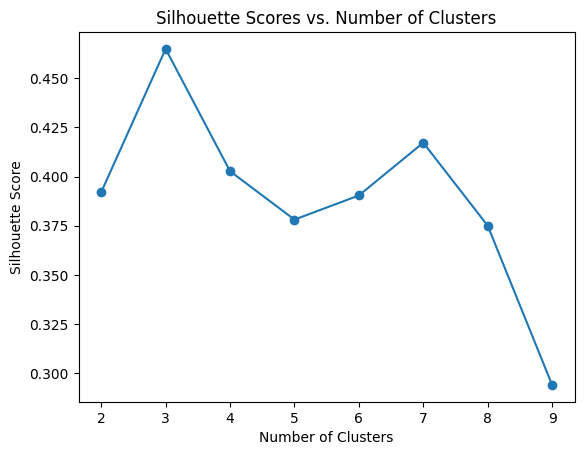

In [299]:
import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [300]:
from sklearn.metrics import silhouette_score
scores = []
# Compute silhouette score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(reduced_vectors_umap)
    score = silhouette_score(reduced_vectors_umap, labels)
    scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.4443071484565735
Number of clusters: 3, Silhouette Score: 0.3595767319202423
Number of clusters: 4, Silhouette Score: 0.25227272510528564
Number of clusters: 5, Silhouette Score: 0.21656182408332825
Number of clusters: 6, Silhouette Score: 0.24688728153705597
Number of clusters: 7, Silhouette Score: 0.21134541928768158
Number of clusters: 8, Silhouette Score: 0.13611415028572083
Number of clusters: 9, Silhouette Score: 0.18406736850738525


# KMeans clustering

In [301]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(reduced_vectors_PCA)

# Predict the clusters
labels = kmeans.predict(reduced_vectors_PCA)

# Cluster centers
centroids = kmeans.cluster_centers_



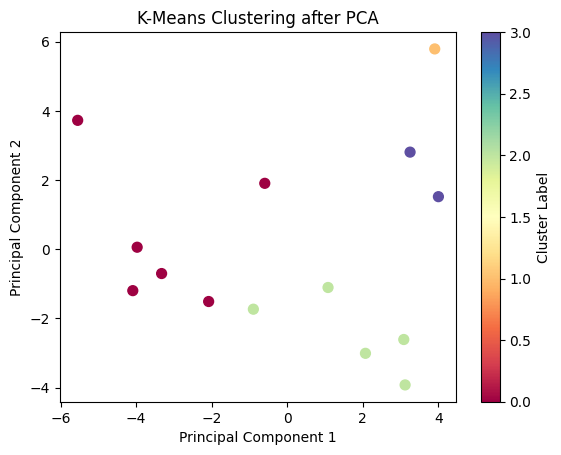

In [302]:
import matplotlib.pyplot as plt

plt.scatter(reduced_vectors_PCA[:, 0], reduced_vectors_PCA[:, 1], c=labels, cmap='Spectral', s=50)
plt.title('K-Means Clustering after PCA')
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()